In [4]:
import cv2
from matiplotlib.pyplot import plt

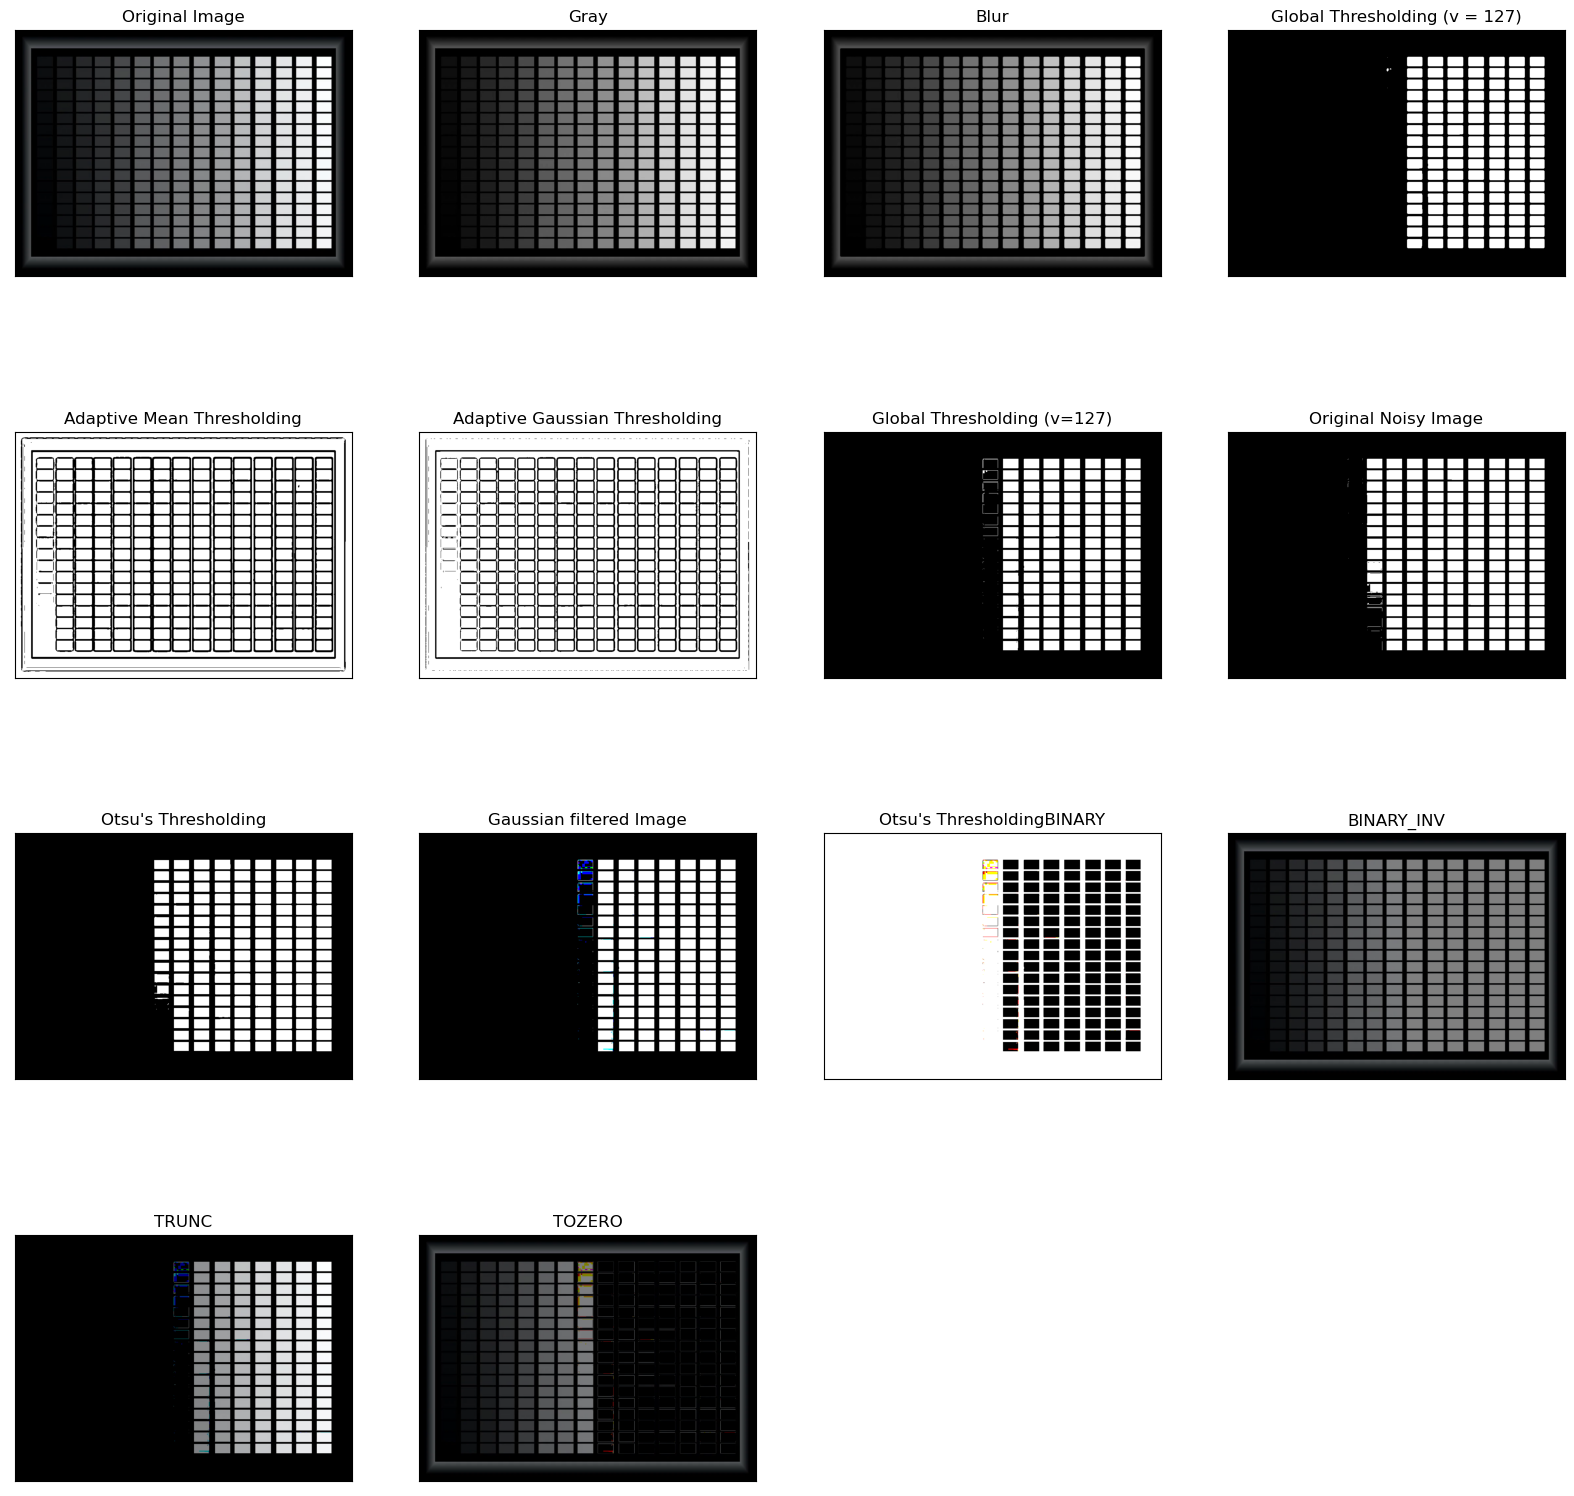

In [62]:
img =cv.imread("g.jpg")
img = cv.bitwise_not(img)
# plt.imshow(img)
# plt.axis("off")
# plt.show()
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgB = cv.medianBlur(imgG,5)

ret,th1 = cv.threshold(imgB,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(imgB,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(imgB,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)


ret1,th11 = cv.threshold(imgG,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th22 = cv.threshold(imgG,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(imgG,(5,5),0)
ret3,th33 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)

ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)


images=[img,imgG,imgB,th1,th2,th3,th11,th22,th33,thresh1,thresh2,thresh3,thresh4,thresh5]
titles = ['Original Image','Gray','Blur','Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'
          ,'Global Thresholding (v=127)','Original Noisy Image',"Otsu's Thresholding",
          'Gaussian filtered Image',"Otsu's Thresholding"
          'BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(4,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])